<a href="https://colab.research.google.com/github/K-J-HYEON/good/blob/add-input-method/21_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________

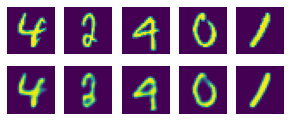

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

#MNIST데이터 셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

#생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다.(입력된 값의 차원을 축소시키는 인코딩 부분)
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
# 28 * 28크기가 층을 지나면서 어떻게 바뀌냐?
# 밑에 MaxPooling층을 지나면서 절반씩 줄어들 것이고, 디코딩 부분에 unsampling층을 지나면서 두배로 늘어난다.
# 근데 MaxPooling층은 2번인데 unsampling층은 3번이다 => 28 * 28보다 더 크게 출력되는 것은 아닌가?
# 마지막 unsampling과정 이루어지는 단계 전에 옵션에 padding과정이 없다. 크기를 유지시켜 주는 패딩과정이 없으므로 커널이 적용되면서 크기가 줄어든다.


autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))


# ==> 인코딩과 디코딩 두 부분이 하나의 Sequential() 함수로 쭉 이어져 오토인코더 모델을 만든다.


# 디코딩 부분이 이어집니다.(다시 차원을 점차 늘려 입력 값과 똑같은 크기의 출력 값을 내보내는 디코딩 부분)
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.
autoencoder.summary()




# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

#학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옵니다.

#테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정합니다.




for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.  
   ax.axis('off')   
   ax = plt.subplot(2, 7, 7 + i +1)
   
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')

plt.show()
